# Sprint
# 深層学習スクラッチ ニューラルネットワーク

## 1.このSprintについて
### Sprintの目的
- スクラッチを通してニューラルネットワークの基礎を理解する
- 画像データの扱い方を知る

### どのように学ぶか
スクラッチで単純なニューラルネットワークを実装した後、学習と検証を行なっていきます。

In [1]:
# import modules
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## 2.MNISTデータセット
ニューラルネットワークスクラッチの検証にはMNISTデータセットを使用します。各種ライブラリやサイトからダウンロードできますが、ここでは深層学習フレームワークのKerasを用います。以下のコードを実行すればデータセットをダウンロードし、展開まで行えます。

In [2]:
# 《データセットをダウンロードするコード》
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### 《MNISTとは？》


画像分類のための定番データセットで、手書き数字認識を行います。このデータセットには訓練用6万枚、テスト用1万枚の28×28ピクセルの白黒画像、およびそれらが0〜9のどの数字であるかというラベルが含まれています。


#### 《画像データとは？》


デジタル画像は点の集合で、これをピクセルと呼びます。一般的に白黒画像であればピクセルには0〜255の値が含まれます。一方、カラー画像であればR（赤）、G（緑）、B（青）それぞれに対応する0〜255の値が含まれます。機械学習をする上では、この0〜255の値一つひとつが特徴量として扱われます。0〜255は符号なしの8ビット整数で表せる範囲になるため、NumPyであれば「uint8」型の変数として保持できます。



### データセットの確認
どういったデータなのかを見てみます。

In [3]:
# 《サンプルコード》
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

各データは28×28ピクセルの白黒画像です。

### 平滑化
(1, 28, 28)の各画像を、(1, 784)に変換します。これまで学んできた機械学習手法や、今回扱う全結合層のみのニューラルネットワークではこの形で扱います。全てのピクセルが一列になっていることを、**平滑化（flatten）**してあるという風に表現します。

In [4]:
# 《サンプルコード》
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

#### 《補足》


ここまで機械学習を学んでくる中で、特徴量の数を「次元」と呼んできました。その視点ではMNISTは784次元のデータです。一方で、NumPyのshapeが(784,)の状態を1次元配列とも呼びます。画像としての縦横の情報を持つ（28, 28)の状態であれば、2次元配列です。この視点では2次元のデータです。さらに、もしもカラー画像であれば(28, 28, 3)ということになり、3次元配列です。先ほどの視点では3次元のデータになります。しかし、白黒でもカラーでも平面画像であり、立体データではないという視点で、2次元のデータです。画像データを扱う際にはこのように「次元」という言葉が複数の意味合いで使われることに注意してください。

### 画像データの可視化
画像データを可視化します。`plt.imshow`に渡します。

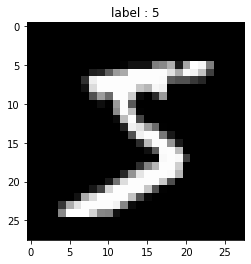

In [5]:
# 《サンプルコード》
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

[numpy.reshape — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)


[matplotlib.pyplot.imshow — Matplotlib 3.1.1 documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

#### 《発展的話題》


画像データは符号なし8ビット整数のuint8型で保持されることが一般的ですが、`plt.imshow`はより自由な配列を画像として表示することが可能です。例えば、以下のようにマイナスの値を持ったfloat64型の浮動小数点であってもエラーにはならないし、先ほどと全く同じ風に表示されます。

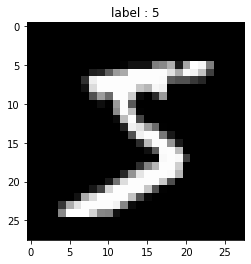

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

これは、自動的に値を0〜255の整数に変換して処理するように作られているからです。uint8型であっても最小値が0、最大値が255でない場合には色合いがおかしくなります。それを防ぐためには次のように引数を入れてください。

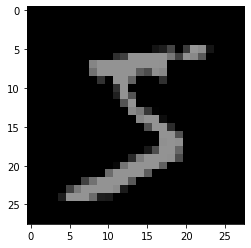

In [7]:
plt.imshow(image, 'gray', vmin = 0, vmax = 255)

画像関係のライブラリではこの自動的なスケーリングが思わぬ結果を生むことがあるので、新しいメソッドを使うときには確認しておきましょう。

### 前処理
画像は0から255のuint8型で表されますが、機械学習をする上では0から1のfloat型で扱うことになります。以下のコードで変換可能です。

In [8]:
# 《サンプルコード》
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


また、正解ラベルは0から9の整数ですが、ニューラルネットワークで多クラス分類を行う際には**one-hot表現**に変換します。scikit-learnの`OneHotEncoder`を使用したコードが以下です。このone-hot表現による値はそのラベルである確率を示していることになるため、float型で扱います。

In [9]:
# 《サンプルコード》
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


[sklearn.preprocessing.OneHotEncoder — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

さらに、訓練データ6万枚の内2割を検証データとして分割してください。訓練データが48000枚、検証データが12000枚となります。

In [10]:
# 《サンプルコード》
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


## 3.ニューラルネットワークスクラッチ
ニューラルネットワークのクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


今回は多クラス分類を行う3層のニューラルネットワークを作成します。層の数などは固定した上でニューラルネットワークの基本を学びます。次のSprintで層を自由に変えられる設計にしていきます。


以下に雛形を用意してあります。このScratchSimpleNeuralNetrowkClassifierクラスにコードを書き加えていってください。

In [156]:
import time
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器

    Parameters
    ----------
    alpha : float
        学習率
    sigma : float
        ガウス分布の標準偏差
    batch_size : int
        バッチのサイズ
    epoch : int
        エポック数

    Attributes
    ----------
    self.loss : list
        交差エントロピー誤差（訓練データ）
    self.val_loss : list
        交差エントロピー誤差（バリデーションデータ）        
    """
    def __init__(self, alpha=0.01, sigma=0.01, batch_size=20, epoch=1, verbose = True):
        self.alpha = alpha
        self.sigma = sigma
        self.batch_size = batch_size
        self.epoch = epoch
        self.verbose = verbose

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # praparing
        n_features = X.shape[1] # 特徴量の数
        n_nodes1 = 400 # 1層目のノード数
        n_nodes2 = 200 # 2層目のノード数
        n_output = 10 # 出力のクラス数（3層目のノード数）
        
        ## make nodes
        self.node1 = Hierarchy(n_features, n_nodes1, alpha=self.alpha, sigma=self.sigma, function='tanh')
        self.node2 = Hierarchy(n_nodes1, n_nodes2, alpha=self.alpha, sigma=self.sigma, function='tanh')
        self.output = Hierarchy(n_nodes2, n_output, alpha=self.alpha, sigma=self.sigma, function='softmax')

        ## set node connection
        self.node1.set_node_connection(next_node=self.node2)
        self.node2.set_node_connection(prev_node=self.node1, next_node=self.output)
        self.output.set_node_connection(prev_node=self.node2)

        ## one-hot encoding
        enc = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y[:, np.newaxis])
        if y_val is not None:
            y_val_one_hot = enc.transform(y_val[:, np.newaxis])

        ## loss list
        self.loss = []
        self.val_loss = []

        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print('start learning')

        start_time = time.time()

        for e in range(self.epoch):
            print(f'start epoch {e+1}')

            ## mini_batch
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            ## loss list
            self.loss.append([])
            self.val_loss.append([])

            for i, (mini_X_train, mini_y_train) in enumerate(get_mini_batch):
                ## one-hot encoding
                mini_y_train_one_hot = enc.transform(mini_y_train[:, np.newaxis])
                
                ## forward propagation
                y_pred_train = self.node1.forward_propagation(mini_X_train)

                ## append loss
                self.loss[e].append(self.calc_cross_entropy_loss(mini_y_train_one_hot, y_pred_train))
                            
                ## update weight, bias
                self.output.gradient_descent(y_true=mini_y_train_one_hot, X=mini_X_train)

                ## validation
                if (X_val is not None) and (y_val is not None):
                    ### prediction
                    y_pred_valid = self.node1.forward_propagation(X_val)
                    ### append loss
                    self.val_loss[e].append(self.calc_cross_entropy_loss(y_val_one_hot, y_pred_valid))

                ## print progress
                if self.verbose:
                    print(f'\r{i+1}/{len(get_mini_batch)} loop finished', end='')
            if self.verbose:
                print(' : Complete!!')

        end_time = time.time()
        elapsed_time = end_time - start_time
        
        # output loss
        print(f'last train loss: {self.loss[-1][-1]}')
        print(f'last valid loss: {self.val_loss[-1][-1]}')

        print(f'Done! elapsed time: {elapsed_time:.5f}s')

    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        y_pred_one_hot = self.node1.forward_propagation(X)

        return np.argmax(y_pred_one_hot, axis=1)

    def predict_one_hot(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        one-hot表現で予測結果を返す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果(one-hot)
        """
        y_pred_one_hot = self.node1.forward_propagation(X)

        return y_pred_one_hot

    def calc_cross_entropy_loss(self, y_true, y_pred):
        """
        交差エントロピー誤差を算出する
        
        Parameter
        ----------
        y_true : ndarray(n_samples, n_output)
            バッチ内のデータの真の値のone-hot表現
        y_pred : ndarray(n_samples, n_output)
            バッチ内のデータの予測値のone-hot表現
        
        Return
        ----------
            float
            算出された1サンプル当たりの交差エントロピー誤差
        """
        n_samples = y_true.shape[0]

        cross_entropy_loss = (-1 * (np.sum(y_true*np.log(y_pred)))) / n_samples
 
        return cross_entropy_loss

In [137]:
class Hierarchy():
    """
    ニューラルネットワークにおける層に対応するクラス

    Parameters
    ----------
    n_features : int
        特徴量の数
    n_nodes : int
        ノードの数
    alpha : float
        学習率
    sigma : float
        ガウス分布の標準偏差

    Attributes
    ----------
    self.weight : ndarray(n_features, n_nodes)
        重みの配列
    self.bias : ndarray(n_nodes,)
        バイアス項
    self.activation_function : str
        活性化関数
    self.prev_node : Hierarchy
        一つ前の層
    self.next_node : Hierarchy
        次の層
    self.Z : ndarray(batch_size, n_nodes)
        この層における活性化関数の出力
    
    """
    def __init__(self, n_features, n_nodes, alpha=0.01, sigma=0.01, function='sigmoid'):
        self.n_features = n_features
        self.n_nodes = n_nodes
        self.alpha = alpha
        self.sigma = sigma
        self.weight = self.initialize_weight()
        self.bias = np.zeros((n_nodes,))
        self.activation_function = function

    def initialize_weight(self):
        """
        層の重みを初期化する
        
        Returns
        ----------
            ndarray(n_features, n_nodes)
            重みの配列
        """
        return self.sigma * np.random.randn(self.n_features, self.n_nodes)

    def forward_propagation(self, X):
        """
        フォワードプロパゲーションを行う
        
        Parameters
        ----------
        X : ndarray(batch_size, n_features)
            バッチ内データの特徴量
        
        Return
        ----------
            ndarray(batch_size, n_nodes)
            この層の活性化関数の出力を次の層の活性化関数に渡して得られた出力結果
            次の層がない場合はこの層の活性化関数の出力結果を返す
        """
        tmp_output = X@self.weight + self.bias

        # save output
        self.Z = (self.get_activation_function())(tmp_output)

        if self.next_node is not None:
            return self.next_node.forward_propagation(self.Z) 
        else:
            return self.Z

    def get_activation_function(self):
        """
        活性化関数を取得する

        Return
        ----------
            function
            'tanh'の時tanh関数
            'sigmoid'の時sigmoid関数
            'softmax'の時softmax関数
            それ以外はエラー
        """
        if self.activation_function == 'tanh':
            return np.tanh
        elif self.activation_function == 'sigmoid':
            return lambda x: 1 / (1+np.exp(-x))
        elif self.activation_function == 'softmax':
            return lambda x: np.exp(x) / np.sum(np.exp(x), axis=1).reshape(-1, 1)
        else:
            raise ValueError(f'undefined activation function : {self.activation_function}')
    
    def set_node_connection(self, prev_node=None, next_node=None):
        """
        層同士のコネクションを設定する

        Parameters
        ----------
        prev_node : Node
            一つ前の層
        next_node : Node
            次の層
        """
        self.prev_node = prev_node
        self.next_node = next_node

    def gradient_descent(self, partial_L_Z=None, y_true=None, X=None):
        """
        確率的勾配降下法により重みとバイアスを更新する

        Parameters
        ----------
        partial_L_Z : ndarray(batch_size, n_nodes)
        y_true : ndarray(batch_size, n_output)
            どちらか必要
        X : ndarray(batch_size, n_features)
            ニューラルネットへの入力
            第1層の重みの更新に用いる
        """

        if partial_L_Z is not None:
            if self.activation_function == 'tanh':
                partial_L_A = partial_L_Z * (1 - self.Z**2)
            elif self.activation_function == 'sigmoid':
                partial_L_A = partial_L_Z * ((1 - self.Z) * (self.Z))
            elif self.activation_function == 'softmax':
                raise ValueError('this is output hierarchy')
            else:
                raise ValueError(f'undefined activation function : {self.activation_function}')
        elif y_true is not None:
            partial_L_A = self.Z - y_true
        else:
            raise ValueError('need partial or y_true')

        # update bias
        partial_L_B = np.sum(partial_L_A, axis=0)

        # update weight
        if self.prev_node is not None:
            partial_L_W = self.prev_node.Z.T@partial_L_A
        elif X is not None:
            partial_L_W = X.T@partial_L_A
        else:
            raise ValueError('first hierarchy needs X')

        # pass partial_L_Z
        if self.prev_node is not None:
            partial_L_Z_prev = partial_L_A@self.weight.T
            self.prev_node.gradient_descent(partial_L_Z=partial_L_Z_prev, X=X)

        self.bias = self.bias - self.alpha*partial_L_B
        self.weight = self.weight - self.alpha*partial_L_W

### ミニバッチ処理
これまでの機械学習スクラッチでは、全てのサンプルを一度に計算していました。しかし、ニューラルネットワークではデータを分割して入力する**確率的勾配降下法**が一般的です。分割した際のひとかたまりを**ミニバッチ**、そのサンプル数を**バッチサイズ**と呼びます。


今回はバッチサイズを20とします。今回使う訓練データは48000枚ですから、48000÷20で2400回の更新を繰り返すことになります。ニューラルネットワークではこれを2400回**イテレーション（iteration）**すると呼びます。訓練データを一度全て見ると1回の**エポック（epoch）**が終わったことになります。このエポックを複数回繰り返し、学習が完了します。


これを実現するための簡素なイテレータを用意しました。for文で呼び出すと、ミニバッチを取得できます。

In [13]:
# 《コード》
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

このクラスをインスタンス化し、for文を使うことでミニバッチが取り出せます。

In [14]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([8, 2, 0, 4, 6, 9, 7, 9, 9, 3, 8, 9, 4, 0, 0, 1, 1, 1, 6, 9],
      dtype=uint8))


`__getitem__`や`__next__`は`__init__`と同じ特殊メソッドの一種です。

### 学習
ニューラルネットワークの学習はフォワードプロパゲーションとバックプロパゲションの繰り返しになります。

### 【問題1】
#### 重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。


#### 《サンプルコード》
```python
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)
```

[numpy.random.randn — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html)

```python
    def initialize_weight(self):
        """
        層の重みを初期化する
        
        Returns
        ----------
            ndarray(n_features, n_nodes)
            重みの配列
        """
        return self.sigma * np.random.randn(self.n_features, self.n_nodes)
```

### 【問題2】
#### フォワードプロパゲーションの実装
三層のニューラルネットワークの**フォワードプロパゲーション**を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

```
batch_size = 20 # バッチサイズ
n_features = 784 # 特徴量の数
n_nodes1 = 400 # 1層目のノード数
n_nodes2 = 200 # 2層目のノード数
n_output = 10 # 出力のクラス数（3層目のノード数）
```

「1層目」

$$
A_1 = X \cdot W_1 + B_1
$$

$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


$B_1$ : 1層目のバイアス (n_nodes1,)


$A_1$ : 出力 (batch_size, n_nodes1)

「1層目の活性化関数」

$$
Z_1 = f(A_1)
$$

$f()$ : 活性化関数


$Z_1$ 出力 (batch_size, n_nodes1)

「2層目」

$$
A_2 = Z_1 \cdot W_2 + B_2
$$

$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


$B_2$ : 2層目のバイアス (n_nodes2,)


$A_2$ : 出力 (batch_size, n_nodes2)

「2層目の活性化関数」

$$
Z_2 = f(A_2)
$$

$f()$ : 活性化関数


$Z_2$ 出力 (batch_size, n_nodes2)

「3層目（出力層）」

$$
A_3 = Z_2 \cdot W_3 + B_3
$$

$W_3$ : 3層目の重み (n_nodes2, n_output)


$B_3$ : 3層目のバイアス (n_output,)


$A_3$ : 出力 (batch_size, n_output)

「3層目の活性化関数」

$$
Z_3 = softmax(A_3)
$$

$softmax()$ : ソフトマックス関数


$Z_3$ 出力 (batch_size, n_output)


$Z_3$ は各ラベル（0〜9）に対する確率の配列である。

### 活性化関数（フォワードプロバゲーション）
活性化関数を作成し、フォワードプロパゲーションの中で使用します。切り替えられるように実装することを推奨しますが、片方でも構いません。


「シグモイド関数」

$$
f(Z) = sigmoid(A) = \frac{1}{1+exp(-A)}
$$

指数関数 $exp(-A)$ の計算は`np.exp`を使用してください。


[numpy.exp — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)


「ハイパボリックタンジェント関数」


次の数式で表されますが、`np.tanh`ひとつで実現できます。

$$
f(Z) = tanh(A) = \frac{exp(A) - exp(-A)}{exp(A) + exp(-A)}
$$

[numpy.tanh — NumPy v1.15 Manual](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tanh.html)


＊現在ではこれらの代わりにReLUと呼ばれる活性化関数が一般的です。次のSprintで扱います。

### ソフトマックス関数
ソフトマックス関数を作成し、フォワードプロパゲーションの中で使用します。これも活性化関数の一種ですが、多クラス分類の出力層で使われる特性上、区別して扱われることが多いです。


次の数式です。

$$
Z_{3\_k} = \frac{exp(A_{3\_k})}{\sum_{i=1}^{n_c}exp(A_{3\_i})}
$$

$Z_{3_k}$ : $k$ 番目のクラスの確率ベクトル (batch_size,)


$A_{3_k}$ : $k$ 番目のクラスにあたる前の層からのベクトル (batch_size,)


$n_c$ : クラスの数、n_output。今回のMNISTでは10。


分母は全てのクラスに相当する値を指数関数に通した上で足し合わせたものです。その中で、分子に $k$ 番目のクラスを持ってくることで、 $k$ 番目のクラスである確率が求まります。


これを10クラス分計算し、合わせたものが $Z_3$ です。

一つの層と活性化関数に対応するクラスを作成
```python
class Hierarchy():
    """
    ニューラルネットワークにおける層に対応するクラス

    Parameters
    ----------
    n_features : int
        特徴量の数
    n_nodes : int
        ノードの数
    alpha : float
        学習率
    sigma : float
        ガウス分布の標準偏差

    Attributes
    ----------
    self.weight : ndarray(n_features, n_nodes)
        重みの配列
    self.bias : ndarray(n_nodes,)
        バイアス項
    self.activation_function : str
        活性化関数
    self.prev_node : Hierarchy
        一つ前の層
    self.next_node : Hierarchy
        次の層
    self.output : ndarray(batch_size, n_nodes)
        この層における活性化関数の出力
    
    """
    def __init__(self, n_features, n_nodes, alpha=0.01, sigma=0.01, function='sigmoid'):
        self.n_features = n_features
        self.n_nodes = n_nodes
        self.alpha = alpha
        self.sigma = sigma
        self.weight = self.initialize_weight()
        self.bias = np.zeros((n_nodes,))
        self.activation_function = function

    def initialize_weight(self):
        """
        層の重みを初期化する
        
        Returns
        ----------
            ndarray(n_features, n_nodes)
            重みの配列
        """
        return self.sigma * np.random.randn(self.n_features, self.n_nodes)

    def forward_propagation(self, X):
        """
        フォワードプロパゲーションを行う
        
        Parameters
        ----------
        X : ndarray(batch_size, n_features)
            バッチ内データの特徴量
        
        Return
        ----------
            ndarray(batch_size, n_nodes)
            この層の活性化関数の出力を次の層の活性化関数に渡して得られた出力結果
            次の層がない場合はこの層の活性化関数の出力結果を返す
        """
        tmp_output = X@self.weight + self.bias
        
        # save output
        self.output = (self.get_activation_function())(tmp_output)

        if self.next_node is not None:
            return self.next_node.forward_propagation(self.output) 
        else:
            return self.output

    def get_activation_function(self):
        """
        活性化関数を取得する

        Return
        ----------
            function
            'tanh'の時tanh関数
            'sigmoid'の時sigmoid関数
            'softmax'の時softmax関数
            それ以外はエラー
        """
        if self.activation_function == 'tanh':
            return np.tanh
        elif self.activation_function == 'sigmoid':
            return lambda x: 1 / (1+np.exp(-x))
        elif self.activation_function == 'softmax':
            return lambda x: np.exp(x) / np.sum(np.exp(x), axis=1)
        else:
            raise ValueError(f'undefined activation function : {self.activation_function}')
    
    def set_node_connection(self, prev_node=None, next_node=None):
        """
        層同士のコネクションを設定する

        Parameters
        ----------
        prev_node : Node
            一つ前の層
        next_node : Node
            次の層
        """
        self.prev_node = prev_node
        self.next_node = next_node
```

fit関数内でノードを定義
```python
        # praparing
        batch_size = 20 # バッチサイズ
        n_features = 784 # 特徴量の数
        n_nodes1 = 400 # 1層目のノード数
        n_nodes2 = 200 # 2層目のノード数
        n_output = 10 # 出力のクラス数（3層目のノード数）
        
        # make nodes
        node1 = Hierarchy(n_features, n_nodes1, sigma=0.01, function='tanh')
        node2 = Hierarchy(n_nodes1, n_nodes2, sigma=0.01, function='tanh')
        output = Hierarchy(n_nodes2, n_output, sigma=0.01, function='softmax')
```

### 【問題3】
#### 交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 $L$ は次の数式です。

$$
L = - \frac{1}{n_b}\sum_{j}^{n_b}\sum_{k}^{n_c}y_{jk} log(z_{3\_jk})
$$

$y_{ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの正解ラベル（one-hot表現で0か1のスカラー）


$z_{3_ij}$ : $j$ 番目のサンプルの $k$ 番目のクラスの確率（スカラー）


$n_{b}$ : バッチサイズ、batch_size


$n_{c}$ : クラスの数、n_output（今回のMNISTでは10）


サンプル1つあたりの誤差が求まります。

行列演算で実装。内積の平均をとることでサンプル当たりの誤差を算出。
```python
    def calc_cross_entropy_loss(self, y_true, y_pred):
        """
        交差エントロピー誤差を算出する
        
        Parameter
        ----------
        y_true : ndarray(n_samples, n_output)
            バッチ内のデータの真の値のone-hot表現
        y_pred : ndarray(n_samples, n_output)
            バッチ内のデータの予測値のone-hot表現
        
        Return
        ----------
            float
            算出された1サンプル当たりの交差エントロピー誤差
        """
        cross_entropy_loss = -1 * (np.mean(y_true@y_pred.T))
 
        return cross_entropy_loss
```

### 【問題4】
#### バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 $W_i$ と $B_i$ に対し、更新後の $W_i^{\prime}$ と $B_i^{\prime}$ は次の数式で求められます。

$$
W_i^{\prime} = W_i - \alpha \frac{\partial L}{\partial W_i} \\
B_i^{\prime} = B_i - \alpha \frac{\partial L}{\partial B_i}
$$

$\alpha$ : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


$\frac{\partial L}{\partial W_i}$ : $W_i$ に関する損失 $L$ の勾配


$\frac{\partial L}{\partial B_i}$ : $B_i$ に関する損失 $L$ の勾配


＊この勾配はミニバッチのサンプル数分の合計または平均を考えます。ここでは合計を計算します。


この更新方法はSprint3線形回帰やsprint4ロジスティック回帰における最急降下法と同様です。より効果的な更新方法が知られており、それは次のSprintで扱います。


勾配 $\frac{\partial L}{\partial W_i}$ や $\frac{\partial L}{\partial B_i}$ を求めるために、バックプロパゲーションを行います。以下の数式です。ハイパボリックタンジェント関数を使用した例を載せました。シグモイド関数の場合の数式はその後ろにあります。


「3層目」

$$
\frac{\partial L}{\partial A_3} = Z_{3} - Y\\
\frac{\partial L}{\partial B_3} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{3\_j}}\\
\frac{\partial L}{\partial W_3} = Z_{2}^{T}\cdot \frac{\partial L}{\partial A_3}\\
\frac{\partial L}{\partial Z_2} = \frac{\partial L}{\partial A_3} \cdot W_3^T
$$

$\frac{\partial L}{\partial A_3}$ : $A_3$ に関する損失 $L$ の勾配 (batch_size, n_output)


$\frac{\partial L}{\partial A_{3_j}}$ : j番目のサンプルの$A_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial B_3}$ : $B_3$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_3}$ : $W_3$ に関する損失 $L$ の勾配 (n_nodes2, n_output)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$Z_{3}$ : ソフトマックス関数の出力 (batch_size, n_nodes2)


$Y$ : 正解ラベル (batch_size, n_output)


$Z_{2}$ : 2層目の活性化関数の出力 (batch_size, n_nodes2)


$W_3$ : 3層目の重み (n_nodes2, n_output)


「2層目」

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot \{1-tanh^2(A_{2})\}\\
\frac{\partial L}{\partial B_2} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{2\_j}}\\
\frac{\partial L}{\partial W_2} = Z_{1}^T \cdot \frac{\partial L}{\partial A_2}\\
\frac{\partial L}{\partial Z_1} = \frac{\partial L}{\partial A_2} \cdot W_2^T
$$

$\frac{\partial L}{\partial A_2}$ : $A_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$\frac{\partial L}{\partial A_{2_j}}$ : j番目のサンプルの$A_2$ に関する損失 $L$ の勾配 (n_nodes2,)


$\frac{\partial L}{\partial B_2}$ : $B_2$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_2}$ : $W_2$ に関する損失 $L$ の勾配 (n_nodes1, n_nodes2)


$\frac{\partial L}{\partial Z_2}$ : $Z_2$ に関する損失 $L$ の勾配 (batch_size, n_nodes2)


$A_2$ : 2層目の出力 (batch_size, n_nodes2)


$Z_{1}$ : 1層目の活性化関数の出力 (batch_size, n_nodes1)


$W_2$ : 2層目の重み (n_nodes1, n_nodes2)


「1層目」

$$
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot \{1-tanh^2(A_{1})\}\\
\frac{\partial L}{\partial B_1} = \sum_{j}^{n_b}\frac{\partial L}{\partial A_{1\_j}}\\
\frac{\partial L}{\partial W_1} = X^T \cdot \frac{\partial L}{\partial A_1}\\
$$

$\frac{\partial L}{\partial A_1}$ : $A_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$\frac{\partial L}{\partial A_{1_j}}$ : j番目のサンプルの$A_1$ に関する損失 $L$ の勾配 (n_nodes1,)


$\frac{\partial L}{\partial B_1}$ : $B_1$ に関する損失 $L$ の勾配 (n_output,)


$\frac{\partial L}{\partial W_1}$ : $W_1$ に関する損失 $L$ の勾配 (n_features, n_nodes1)


$\frac{\partial L}{\partial Z_1}$ : $Z_1$ に関する損失 $L$ の勾配 (batch_size, n_nodes1)


$A_1$ : 1層目の出力 (batch_size, n_nodes1)


$X$ : 特徴量ベクトル (batch_size, n_features)


$W_1$ : 1層目の重み (n_features, n_nodes1)


《補足》


活性化関数にシグモイド関数を使用した場合は、次のようになります。

$$
\frac{\partial L}{\partial A_2} = \frac{\partial L}{\partial Z_2} \odot  \{1-sigmoid(A_{2})\}sigmoid(A_{2})
\\
\frac{\partial L}{\partial A_1} = \frac{\partial L}{\partial Z_1} \odot  \{1-sigmoid(A_{1})\}sigmoid(A_{1})
$$

```python

    def gradient_descent(self, partial_L_Z=None, y_true=None, X=None):
        """
        確率的勾配降下法により重みとバイアスを更新する

        Parameters
        ----------
        partial_L_Z : ndarray(batch_size, n_nodes)
        y_true : ndarray(batch_size, n_output)
            どちらか必要
        X : ndarray(batch_size, n_features)
            ニューラルネットへの入力
            第1層の重みの更新に用いる
        """

        if partial_L_Z is not None:
            if self.activation_function == 'tanh':
                partial_L_A = partial_L_Z * (1 - ((self.get_activation_function())(self.output))**2)
            elif self.activation_function == 'sigmoid':
                partial_L_A = partial_L_Z * ((1 - ((self.get_activation_function())(self.output))) * ((self.get_activation_function())(self.output)))
            elif self.activation_function == 'softmax':
                raise ValueError('this is output hierarchy')
            else:
                raise ValueError(f'undefined activation function : {self.activation_function}')
        elif y_true is not None:
            partial_L_A = self.output - y_true
        else:
            raise ValueError('need partial or y_true')

        # update bias
        partial_L_B = np.sum(partial_L_A, axis=0) 
        self.bias = self.bias - self.alpha*partial_L_B

        # update weight
        if self.prev_node is not None:
            partial_L_W = self.prev_node.output.T@partial_L_A
        elif X is not None:
            partial_L_W = X.T@partial_L_A
        else:
            raise ValueError('first hierarchy needs X')

        self.weight = self.weight - self.alpha*partial_L_W
        
        # pass partial_L_Z
        if self.prev_node is not None:
            partial_L_Z_prev = partial_L_A@self.weight
            self.prev_node.gradient_descent(partial_L_Z=partial_L_Z_prev, X=X)
```

### 【問題5】
#### 推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。


[numpy.argmax — NumPy v1.17 Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)

```python
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        y_pred_one_hot = self.node1.forward_propagation(X)

        return np.argmax(y_pred_one_hot, axis=1)
```

### 【問題6】
#### 学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。

In [177]:
scratchNN = ScratchSimpleNeuralNetrowkClassifier(alpha=0.003, sigma=0.1, batch_size=200, epoch=10, verbose = True)
scratchNN.fit(X_train, y_train, X_test, y_test)

start learning
start epoch 1
240/240 loop finished : Complete!!
start epoch 2
240/240 loop finished : Complete!!
start epoch 3
240/240 loop finished : Complete!!
start epoch 4
240/240 loop finished : Complete!!
start epoch 5
240/240 loop finished : Complete!!
start epoch 6
240/240 loop finished : Complete!!
start epoch 7
240/240 loop finished : Complete!!
start epoch 8
240/240 loop finished : Complete!!
start epoch 9
240/240 loop finished : Complete!!
start epoch 10
240/240 loop finished : Complete!!
last train loss: 0.017442600355399053
last valid loss: 0.10040588471661761
Done! elapsed time: 1058.85042s


In [178]:
from sklearn.metrics import accuracy_score
y_test_pred = scratchNN.predict(X_test)
print(y_test_pred)
print(y_test)
print(f'Accuracy: {accuracy_score(y_test, y_test_pred)}')

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
Accuracy: 0.9718


In [179]:
from sklearn.metrics import confusion_matrix
conf_m = confusion_matrix(y_test, y_test_pred) 
print(conf_m)

[[ 968    0    1    2    0    2    5    1    1    0]
 [   0 1123    1    3    0    1    4    1    2    0]
 [   7    2  993    7    2    0    5    7    8    1]
 [   0    1    2  988    0    0    0    9    5    5]
 [   2    0    4    0  955    0    4    4    1   12]
 [   7    1    0   12    3  850   10    2    6    1]
 [   4    2    0    1    5    5  940    0    1    0]
 [   0    2   11    2    1    0    0 1004    2    6]
 [   4    0    2   11    6    7    7    5  930    2]
 [   5    3    1   12   10    1    1    9    0  967]]


In [180]:
sample_sum = np.sum(conf_m, axis=1)
for i in range(conf_m.shape[0]):
    correct = conf_m[i][i]
    incorrect = sample_sum[i] - correct
    print(f'{i}: {correct}:{incorrect} {correct/sample_sum[i]:.2%}')

0: 968:12 98.78%
1: 1123:12 98.94%
2: 993:39 96.22%
3: 988:22 97.82%
4: 955:27 97.25%
5: 850:42 95.29%
6: 940:18 98.12%
7: 1004:24 97.67%
8: 930:44 95.48%
9: 967:42 95.84%


およそ97%の精度を出すことが出来た。

それぞれの数字に対しても最低95%以上の精度を出すことができており、十分に分類ができているといえる。

### 【問題7】
#### 学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

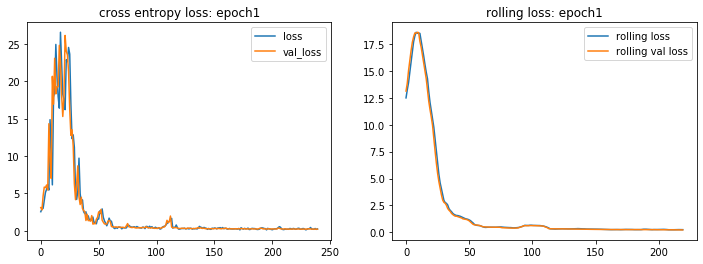

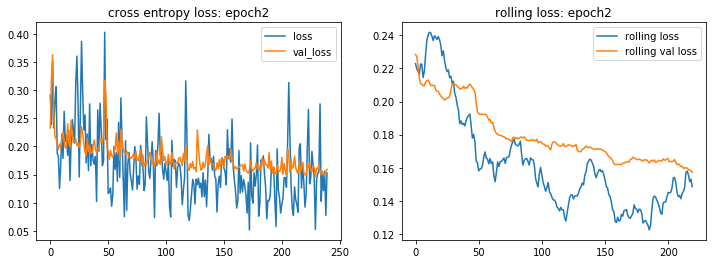

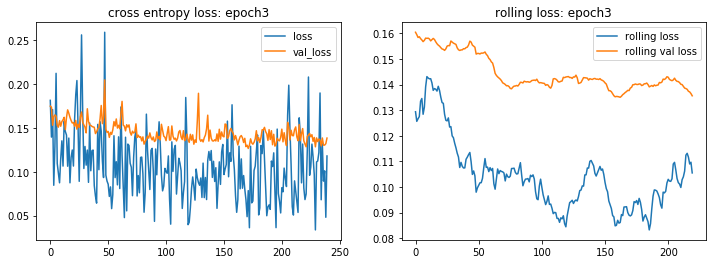

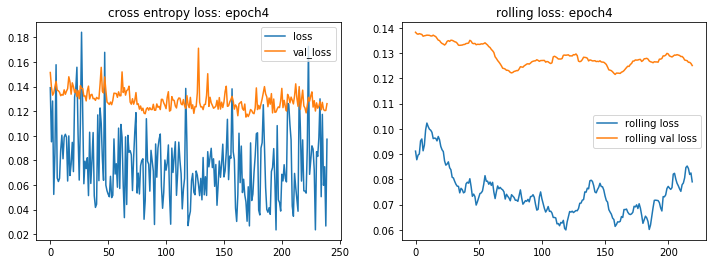

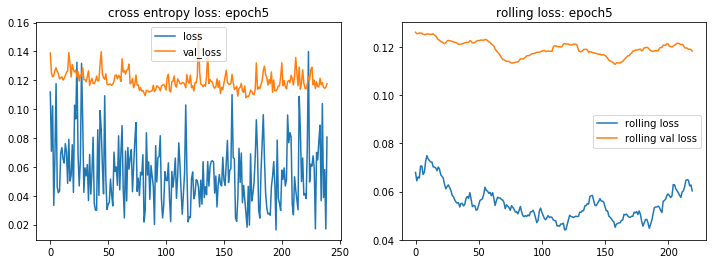

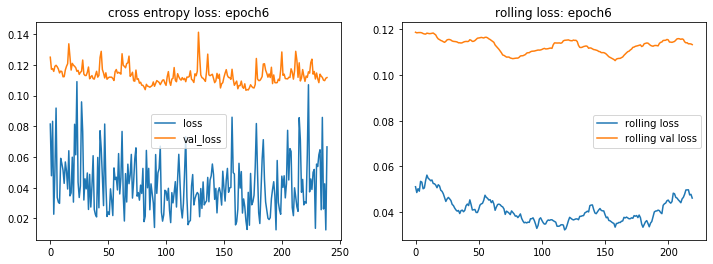

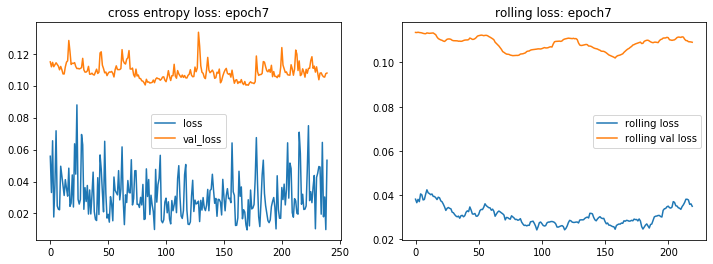

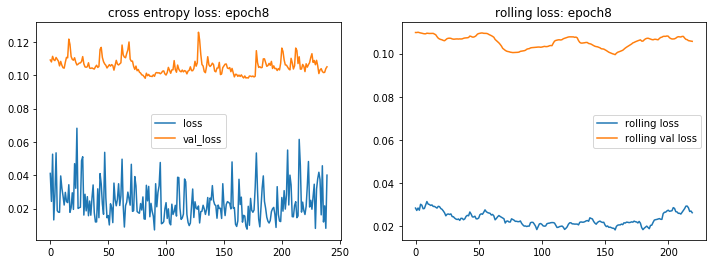

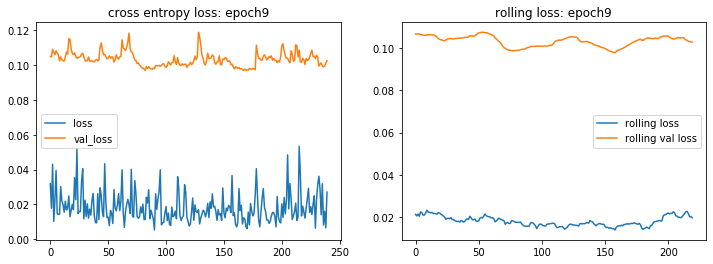

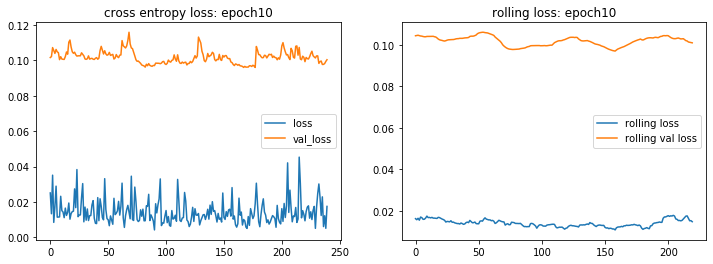

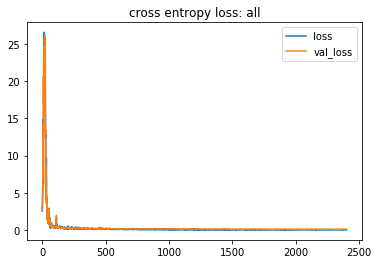

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline

# エポック単位
for i in range(scratchNN.epoch):
    fig = plt.figure(figsize=(12, 4))
    ax1 = fig.add_subplot(121)
    plt.title(f'cross entropy loss: epoch{i+1}')
    plt.plot(range(len(scratchNN.loss[i])), scratchNN.loss[i], label='loss')
    plt.plot(range(len(scratchNN.val_loss[i])), scratchNN.val_loss[i], label='val_loss')
    plt.legend()

    ## 移動平均
    ax2 = fig.add_subplot(122)
    rolling_loss = []
    rolling_val_loss = []
    window_size = 20
    for j in range(len(scratchNN.loss[i])-window_size):
        rolling_loss.append(sum(scratchNN.loss[i][j:j+window_size])/window_size)
        rolling_val_loss.append(sum(scratchNN.val_loss[i][j:j+window_size])/window_size)
    plt.title(f'rolling loss: epoch{i+1}')  
    plt.plot(range(len(rolling_loss)), rolling_loss, label='rolling loss')
    plt.plot(range(len(rolling_val_loss)), rolling_val_loss, label='rolling val loss')
    plt.legend()

    plt.show()

# 全体
plt.title('cross entropy loss: all')
plt.plot(range(len(sum(scratchNN.loss, []))), sum(scratchNN.loss, []), label='loss')
plt.plot(range(len(sum(scratchNN.val_loss, []))), sum(scratchNN.val_loss, []), label='val_loss')

plt.legend()
plt.show()

今回3エポックにおいては、

- 第1エポック：大きく減少
- 第2エポック：やや減少傾向
- 第3, 4エポック：減少してはいるがほぼ収束
- それ以降：ほぼ収束

という結果が得られた。

また、第6エポック付近から学習時の損失の振れ幅が減少していることも見て取れる。

### 【問題8】
#### （アドバンス課題）誤分類の確認
誤分類した画像はどのようなものだったかを確認してください。推定値を用意し、以下のコードを実行してください。

In [193]:
# 《コード》
def true_false_visualize(y_pred, X_val, y_val):
    """
    誤分類結果を並べて表示する。画像の上の表示は「推定結果/正解」である。

    Parameters:
    ----------
    y_pred : 推定値のndarray (n_samples,)
    y_val : 検証データの正解ラベル(n_samples,)
    X_val : 検証データの特徴量（n_samples, n_features)
    """
    import numpy as np
    import matplotlib.pyplot as plt
    num = 81 # いくつ表示するか
    true_false = y_pred==y_val
    false_list = np.where(true_false==False)[0].astype(np.int)
    if false_list.shape[0] < num:
        num = false_list.shape[0]
    fig = plt.figure(figsize=(9, 9))
    fig.subplots_adjust(left=0, right=0.8,  bottom=0, top=0.8, hspace=1, wspace=0.5)
    for i in range(num):
        ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
        ax.set_title("{} / {}".format(y_pred[false_list[i]],y_val[false_list[i]]))
        ax.imshow(X_val.reshape(-1,28,28)[false_list[i]], cmap='gray')

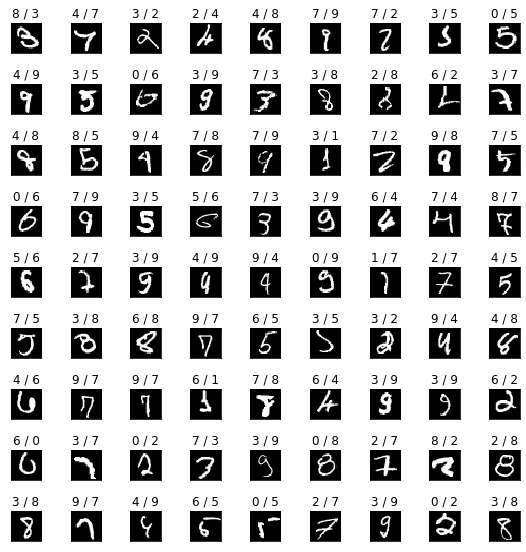

In [194]:
true_false_visualize(y_test_pred, X_test, y_test)

擦れ中には人間の目でも分類が難しいものがあるが、全体として擦れ・潰れ・回転している画像の認識に失敗している傾向がある。精度を上げるためには、学習時に元データ擦れ・潰れ・回転などの加工を施したデータを加える方法が有効であると予想できる。

また、英語圏における7（横線を一本加えたもの）に対応できていないという結果も図から見て取れるため、値するデータを増やすという手法も精度向上に有効かもしれない。